<ErrorbarContainer object of 3 artists>

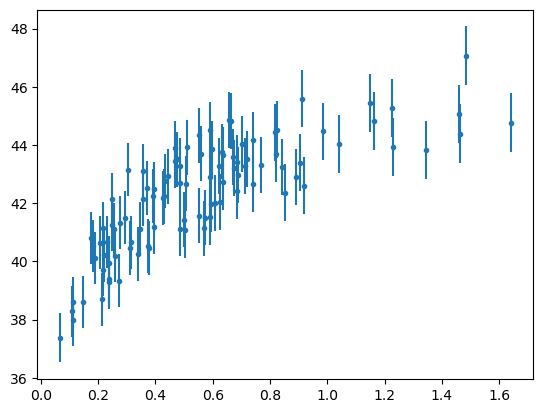

In [2]:
#MESSING WITH DUMMY DATA USING astroML
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import LambdaCDM
from astroML.datasets import generate_mu_z

z_sample, mu_sample, dmu = generate_mu_z(100, random_state = 0)
cosmo = LambdaCDM(H0=70, Om0=0.30, Ode0=0.70, Tcmb0=0)
z = np.linspace(0.01, 2, 1000)
mu_true = cosmo.distmod(z)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.')

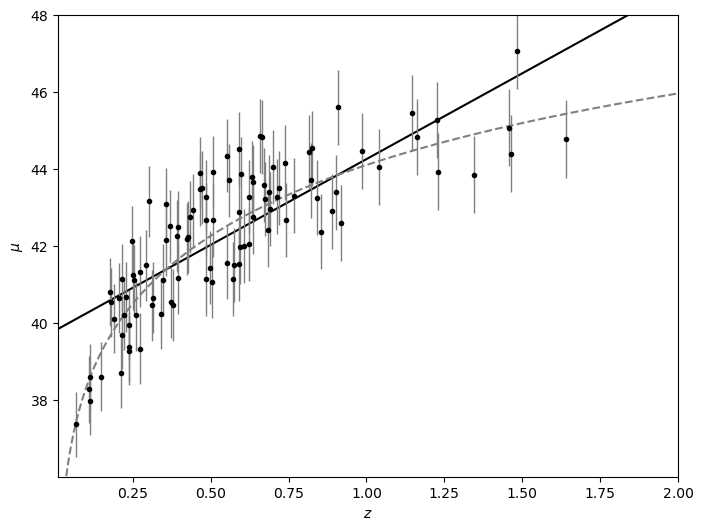

In [30]:
from sklearn.linear_model import LinearRegression as LinearRegression_sk

linear_sk = LinearRegression_sk()
linear_sk.fit(z_sample[:,None], mu_sample)
mu_fit_sk = linear_sk.predict(z[:, None])

#This is how you plot the results
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(1, 1, 1) #1x1 grid on the first subplot

ax.plot(z, mu_fit_sk, '-k')
ax.plot(z, mu_true, '--', c='gray')
ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)

ax.set_xlim(0.01, 2.0)
ax.set_ylim(36.01, 48)

ax.set_ylabel(r'$\mu$')
ax.set_xlabel(r'$z#$')

plt.show()